<a href="https://colab.research.google.com/github/beercafeguy/PyMLLab/blob/master/ML_A_Z/reinforcement/thompson_sampling_simple.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
!ls -ltr /content/drive/MyDrive/ML_A_Z/Part_6_Reinforcement_Learning/Section_33_Thompson_Sampling/Python/Ads_CTR_Optimisation.csv

-rw------- 1 root root 210050 Apr  7  2020 /content/drive/MyDrive/ML_A_Z/Part_6_Reinforcement_Learning/Section_33_Thompson_Sampling/Python/Ads_CTR_Optimisation.csv


In [6]:
path = '/content/drive/MyDrive/ML_A_Z/Part_6_Reinforcement_Learning/Section_33_Thompson_Sampling/Python/Ads_CTR_Optimisation.csv'
df = pd.read_csv(path)
df

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
9995,0,0,1,0,0,0,0,1,0,0
9996,0,0,0,0,0,0,0,0,0,0
9997,0,0,0,0,0,0,0,0,0,0
9998,1,0,0,0,0,0,0,1,0,0


### Implement Thompson Sampling

In [12]:
import random

N = 10000
d = 10

ads_selected = []

rewards_1_nums = [0] * d
rewards_0_nums = [0] * d # list of 10 zeros

total_rewards = 0
for n in range(0,N):
  selected_ad = 0 # initialize selected ad
  max_random = 0
  for i in range(0,d):
    random_beta = random.betavariate(rewards_1_nums[i]+1,rewards_0_nums[i]+1)
    if random_beta > max_random:
      max_random = random_beta
      selected_ad = i

  ads_selected.append(selected_ad)
  reward = df.values[n,selected_ad]
  if reward == 1:
    rewards_1_nums[selected_ad] = rewards_1_nums[selected_ad] + 1
  else:
    rewards_0_nums[selected_ad] = rewards_0_nums[selected_ad] + 1
  total_rewards += reward


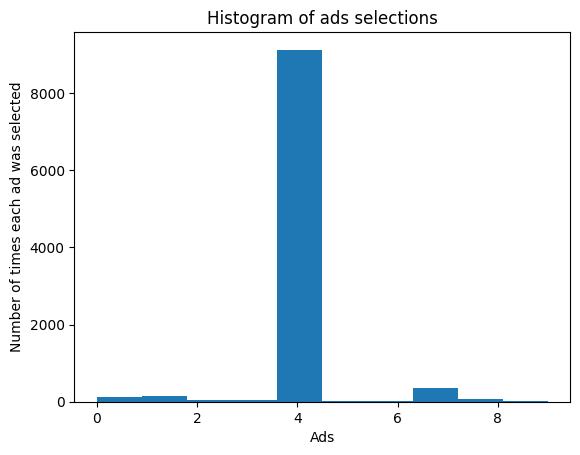

In [13]:
plt.hist(ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()